# SHSAT Participation in New York Schools

## Introduction

Of New York City's highschools, nine "specialized high schools" are set aparat from the rest as elite institutions made up some of the brightest students in the region. These schools offer a variety of academic and art programs to students who are deemed worthy of attending. With the exception of Fiorello H. LaGuardia High School—which is the only specialized school focusing on the arts—New York City's elite specilized schools grant admission based on performance on the Specailized High Schools Admissions Test (SHSAT). The SHSAT is a standardized test that an average of 30,000 students acriss New York's school participate in eaech year. And though the SHSAT's purpose is to isolate merit alone to deterrmine admission into these top schools, various factors have led to black and hispanic students being severely underrepresented in New York City's specialized high schools.



### Race and Economic Need

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Loading Data
school = pd.read_csv('~/ECO225 Project/Data/2016 School Explorer.csv')
SHSAT = pd.read_csv('~/ECO225 Project/Data/D5 SHSAT Registrations and Testers.csv')
SHSAT['School name'] = SHSAT['School name'].str.upper()
SHSAT = SHSAT.rename(columns={'School name': 'School Name'})

#Cleaning data - Converting percentages into floats

def percentfloat(var):
    return float(var.replace('%',''))

races = ['Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']
for r in races:
    school[r] = school[r].apply(percentfloat)
races.remove('Percent Black / Hispanic')

school.set_index('School Name')
SHSAT.set_index('School Name')
data = pd.merge(school, SHSAT, how = 'outer')
data = data.rename({'Number of students who registered for the SHSAT': 'SHSAT Registration',
             'Number of students who took the SHSAT': 'SHSAT Participation'}, axis = 1)

#New column to groupbyy registration for SHSAT status
def registered(df):
    if df == 0:
        return "No Registered Students"
    elif df > 0:
        return "Registered Students"
    else:
        return "Unknown"
data['SHSAT'] = data['SHSAT Registration'].apply(registered)

group1 = data.groupby('SHSAT')
Not = "No Registered Students"
Did = 'Registered Students'


Overall:
        Percent Asian  Percent Black  Percent Hispanic  Percent White
mean        11.005878      33.861132         40.632623      12.467303
min          0.000000       0.000000          2.000000       0.000000
median       3.000000      25.000000         35.000000       2.000000
max         95.000000      97.000000        100.000000      92.000000
std         17.257904      29.193658         25.701830      19.592180
count     1361.000000    1361.000000       1361.000000    1361.000000

Schools With Registrations:
        Percent Asian  Percent Black  Percent Hispanic  Percent White
mean         1.806122      59.928571         33.897959       2.438776
min          0.000000      18.000000         12.000000       0.000000
median       1.000000      66.000000         31.000000       1.000000
max         12.000000      85.000000         77.000000      20.000000
std          3.115171      20.111160         16.749513       4.978441
count       98.000000      98.000000         98.000

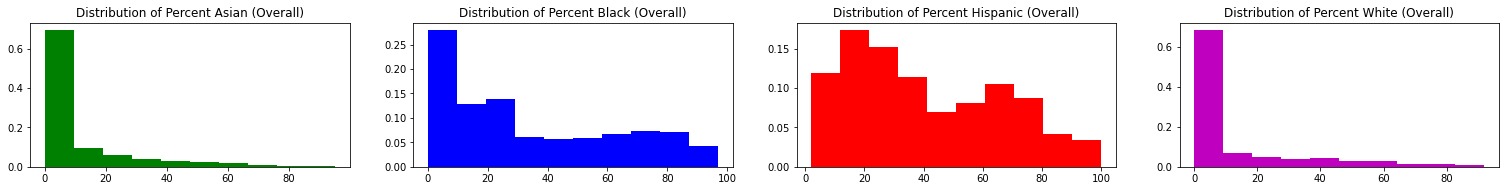

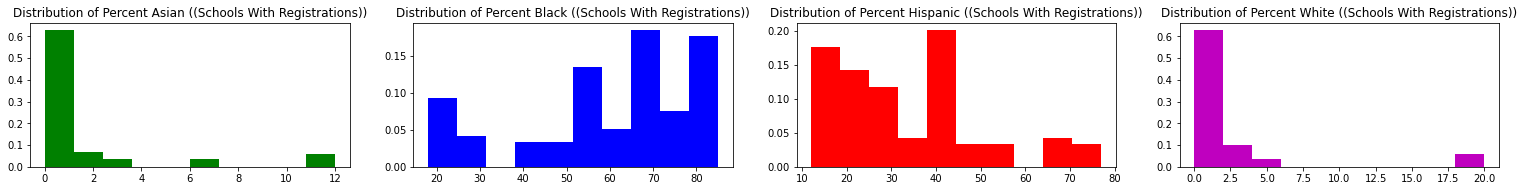

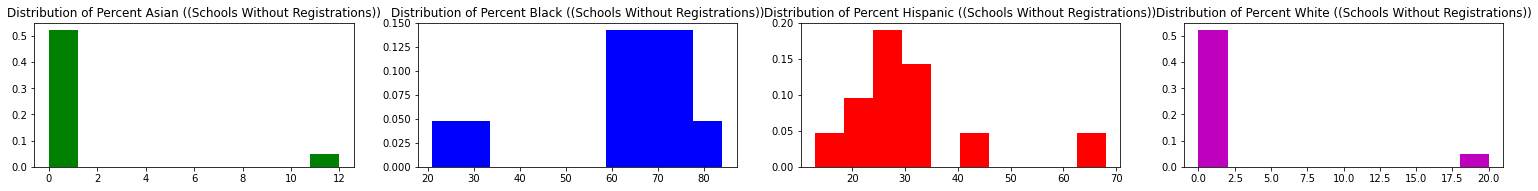

In [68]:
#Comparing racial makeup of schools - summary statistics

dfs = ['Overall', 'Schools With Registrations', 'Schools Without Registrations']
dfs.append('Schools with SHSAT Data')

df_index = 0
for df in [data, group1.get_group(Did), group1.get_group(Not), pd.merge(school, SHSAT, how = 'inner')]:
    stats = ['mean', 'min', 'median', 'max', 'std', 'count']
    print('\n' + dfs[df_index] + ':')
    df_index += 1
    print(df.agg({'Percent Asian' : stats, 'Percent Black' : stats, 'Percent Hispanic' : stats, 'Percent White' : stats}))

#Histograms of percentages of races
df_index = 0
for df in [data, group1.get_group(Did), group1.get_group(Not)]:
    fig, axs = plt.subplots(1,4)
    i = 0
    k = 0
    j = 0
    for r in races:
        color = ['g', 'b', 'r', 'm']
        axs[k].hist(r, color = color[i], data = df, weights=np.ones(len(df)) / len(df))
        axs[k].set_title("Distribution of " + r + ' (' + dfs[df_index] + ')')
        i += 1
        k += 1
    df_index += 1
    plt.subplots_adjust(left = 0, right = 3.4, bottom = 0, top = 0.5)
    plt.show()

Summary statistics and histograms show that New York City's schools are diverse. While there are schools with fewer asian or white students, there are few schools that are completely dominantetd by a given race. Notably, schools that have students registered for the SHSAT are not generally dominated by a certain race. Though the demographics of schools we have SHSAT data for is different than the rest of the population, there does not seem to be a signgificant difference between the demographics of schools that register students for the SHSAT and those which do nott. Thus, we will also investigate the relationships between other factors and participation in the SHSAP. 


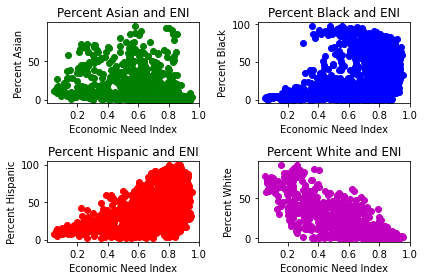

In [51]:
#Economic Need and Race

fig, axs = plt.subplots(2,2)
i = 0
k = 0
j = 0
for r in races:
    if i == 2:
        j = 1
        k = 0
    color = ['g', 'b', 'r', 'm']
    axs[j, k].plot('Economic Need Index', r, 'o', color = color[i], data = school)
    axs[j, k].set_title(r + ' and ENI')
    axs[j, k].set_xlabel('Economic Need Index')
    axs[j, k].set_ylabel(r)
    i += 1
    k += 1
plt.tight_layout()
plt.show()

Scatter plots show that the racial makeup of a school is correlated with economic need. While schools with higher proportion of white students are less likely to be economically disadvantaged, there is strong positive correlation between ENI and the percentage of black black or hispanic students. Though there are exceptiotns, there is a slight negative relationship between ENI and the percentage of asian students in a given school.


Text(0, 0.5, 'Percent Black / Hispanic')

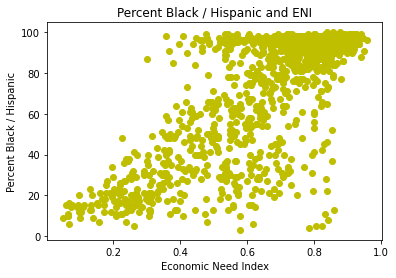

In [15]:
#ENI and Black / Hispanic
plt.plot('Economic Need Index', 'Percent Black / Hispanic', 'o', color = 'y', data = school)
plt.title('Percent Black / Hispanic and ENI')
plt.xlabel('Economic Need Index')
plt.ylabel('Percent Black / Hispanic')


When looking at the percentage of students whos are either black or hispanic, the relationship with ENI is even more defined. Schools in New York City that are mostly populated by black or hispanic students are less well off than those with predominantly white or asian studentst.

#### The Importance of Race and Economic Need

Brownell et al (2006) found that even at a Grade 3 level, students with low socioeconomic status—which is strongly determined byy a family's financial stability—had a pass rate on Language Arts tests 34 percentage points lower than students from with high socioeconomic status. In another approach, Janus and Duku (2010) find a positive correlation between students' family incomes and teachers' assessments of their readiness for school through their assigned Early Development Instrument (EDI) score. Forget-Dubois et al. (2010) show that variations in students' EDI scores account for 36% of variation in their eventual academic achievement.

Evidently, economic well being has an influence on a student's academic success. With such a strong correlation between black and hispanic population and ENI, providing aid to schools that are the most financially disadvantaged will improve black and hispanic students' academic success the most, and may increase the proportion of black and hispanic students in New York's Specialized High Schools.


###### Sources:

Brownell et al. (2006) https://irpp.org/research-studies/is-the-class-half-empty/

Janus and Duku (2010) https://www.tandfonline.com/doi/full/10.1080/10409280701610796a?casa_token=tAuQb9o3tWcAAAAA%3ATf-QJXUI36zcmrAszq8sA544Hs60ANnrBIxLyi6hdIUxX1jiyaDXHmHW21qAv5UdTPi2LSVErQvWgEk

Forget-Dubois et al. (2010) https://www.tandfonline.com/doi/full/10.1080/10409280701610796

In [69]:
#ENI for each groupby

group1['Economic Need Index'].describe()

,count,mean,std,min,25%,50%,75%,max
SHSAT,,,,,,,,
No Registered Students,12.0,0.721083,0.071326,0.507,0.714,0.7390,0.74625,0.798
Registered Students,98.0,0.759204,0.091727,0.507,0.714,0.7550,0.81800,0.903
Unknown,1226.0,0.670538,0.212049,0.049,0.549,0.7285,0.84100,0.957
